# Anime-Recommender-System-Project-2025

<center>
  <img src='https://mostaql.hsoubcdn.com/uploads/thumbnails/1450164/661a5b0c8a072/dataset-card.jpg'width='700'/>
</center>

# Table of Contents
- [1. Project Overview](#1-project-overview)
  - [1.1 Introduction](#11-introduction)
  - [1.2 Problem Statement](#12-problem-statement)
  - [1.3 Objectives](#13-objectives)
- [2. Importing Packages](#2-importing-packages)
- [3. Loading Data](#3-loading-data)
- [4. Data Cleaning](#4-data-cleaning)
- [5. Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
- [6. Preprocessing](#6-preprocessing)
- [7. Model Training](#7-model-training)
- [8. Model Evaluation](#8-model-evaluation)
- [9. Hyperparameter Tuning](#9-hyperparameter-tuning)
- [10. Conclusion](#10-conclusion)

### 1. Project Overview

##### 1.1 Introduction

##### 1.2 Problem Statement

##### 1.3 Objectives

### 2. Importing Packages

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import re
from html import unescape
import html

### 3. Loading and Data Cleaning

In [215]:
import pandas as pd

# Load datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_anime = pd.read_csv('anime.csv')
df_submission = pd.read_csv('submission.csv')

# Check the first few rows
print("Train Data:\n", df_train.head(), "\n")
print("Test Data:\n", df_test.head(), "\n")
print("Anime Data:\n", df_anime.head(), "\n")
print("Submission Data:\n", df_submission.head(), "\n")

# Check for missing values
print("Missing Values in Train:\n", df_train.isnull().sum(), "\n")
print("Missing Values in Test:\n", df_test.isnull().sum(), "\n")
print("Missing Values in Anime:\n", df_anime.isnull().sum(), "\n")
print("Missing Values in Submission:\n", df_submission.isnull().sum(), "\n")

# Check for duplicates
print("Duplicates in Train:", df_train.duplicated().sum())
print("Duplicates in Test:", df_test.duplicated().sum())
print("Duplicates in Anime:", df_anime.duplicated().sum())
print("Duplicates in Submission:", df_submission.duplicated().sum())

# Check column names
print("\nTrain Columns:", df_train.columns)
print("Test Columns:", df_test.columns)
print("Anime Columns:", df_anime.columns)
print("Submission Columns:", df_submission.columns)


Train Data:
    user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4        3        20       8 

Test Data:
    user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281
3    55290       165
4    72323     11111 

Anime Data:
    anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi,

In [216]:
import pandas as pd

# Load datasets
# df_train = pd.read_csv('train.csv')
# df_test = pd.read_csv('test.csv')
# df_anime = pd.read_csv('anime.csv')
# df_submission = pd.read_csv('submission.csv')

# Remove duplicate rows in train data
df_train.drop_duplicates(inplace=True)

# Fill missing values in anime data (using .loc to avoid chained assignment)
df_anime.loc[:, 'genre'] = df_anime['genre'].fillna("Unknown")
df_anime.loc[:, 'type'] = df_anime['type'].fillna("Unknown")
df_anime.loc[:, 'rating'] = df_anime['rating'].fillna(df_anime['rating'].mean())

# Save cleaned datasets
df_train.to_csv('cleaned_train.csv', index=False)
df_anime.to_csv('cleaned_anime.csv', index=False)



#### 3.1. Exploratory Data Analysis(EDA)
In this section, we explore the dataset to understand its structure and the information it contains. The code snippets below provide an overview of the dataset's shape, the number of columns, and metadata information about the dataset.

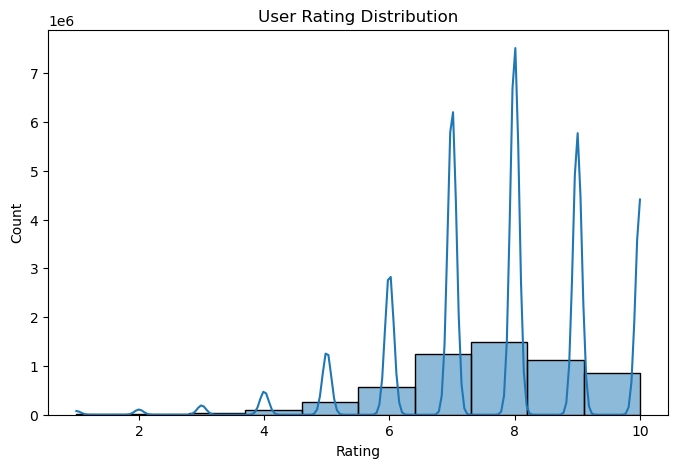

C:\Users\Fransisca Nong\AppData\Local\Temp\ipykernel_12252\2525985942.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_anime['name'], x=top_anime['rating'], palette='viridis')


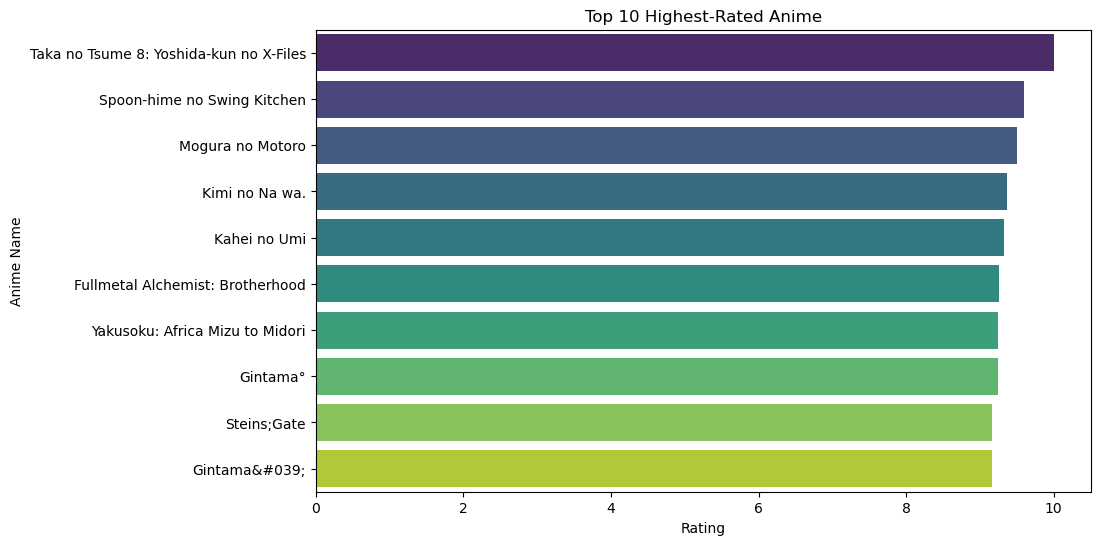

C:\Users\Fransisca Nong\AppData\Local\Temp\ipykernel_12252\2525985942.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_genres, order=all_genres.value_counts().index, palette='coolwarm')


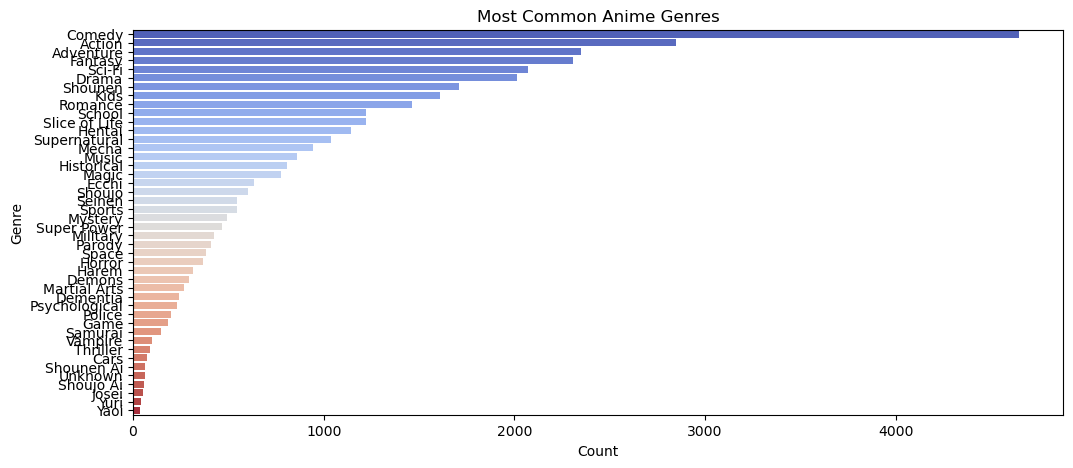

C:\Users\Fransisca Nong\AppData\Local\Temp\ipykernel_12252\2525985942.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_anime['type'], order=df_anime['type'].value_counts().index, palette='muted')


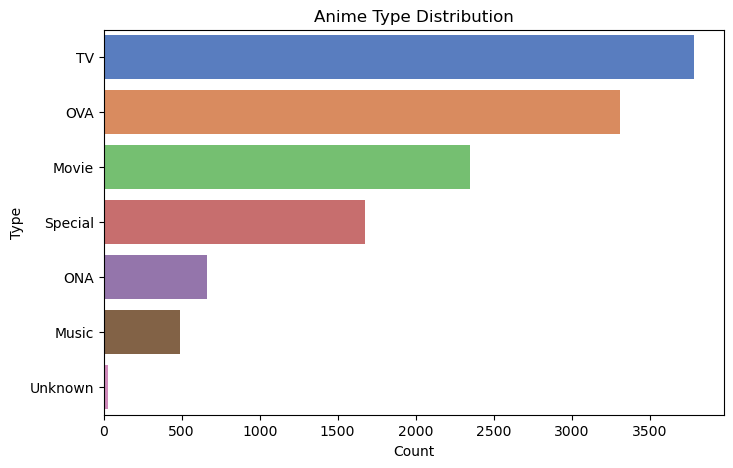

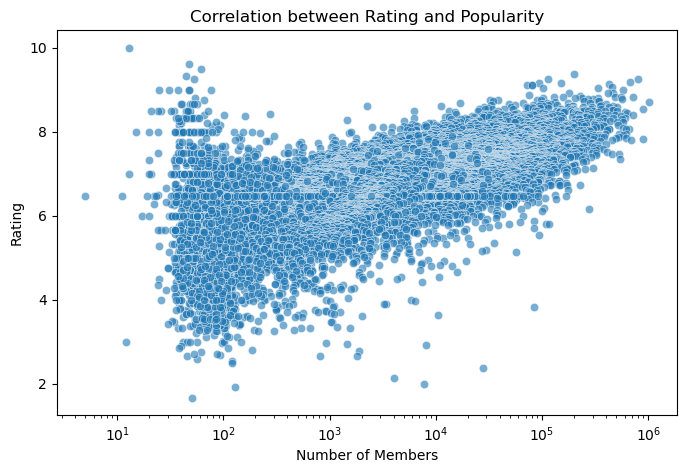

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned datasets
df_train = pd.read_csv('cleaned_train.csv')
df_anime = pd.read_csv('cleaned_anime.csv')

# Distribution of user ratings
plt.figure(figsize=(8, 5))
sns.histplot(df_train['rating'], bins=10, kde=True)
plt.title('User Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Top 10 highest-rated anime
top_anime = df_anime.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_anime['name'], x=top_anime['rating'], palette='viridis')
plt.title('Top 10 Highest-Rated Anime')
plt.xlabel('Rating')
plt.ylabel('Anime Name')
plt.show()

# Most common genres
all_genres = df_anime['genre'].str.split(', ').explode()
plt.figure(figsize=(12, 5))
sns.countplot(y=all_genres, order=all_genres.value_counts().index, palette='coolwarm')
plt.title('Most Common Anime Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Distribution of anime types
plt.figure(figsize=(8, 5))
sns.countplot(y=df_anime['type'], order=df_anime['type'].value_counts().index, palette='muted')
plt.title('Anime Type Distribution')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

#  Correlation between rating and members count
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_anime['members'], y=df_anime['rating'], alpha=0.6)
plt.title('Correlation between Rating and Popularity')
plt.xlabel('Number of Members')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()


In [219]:
datasets = {'Train': df_train, 'Test': df_test, 'Anime': df_anime, 'Submission': df_submission}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info(), "\n")

Dataset: Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703554 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB
None 

Dataset: Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB
None 

Dataset: Anime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5  

**Shape of each dataset**

In [221]:
for name, df in datasets.items():
    print(f"{name} shape: {df.shape}")

Train shape: (5703554, 3)
Test shape: (633686, 2)
Anime shape: (12294, 7)
Submission shape: (3, 2)


**Summary Statistics**

In [223]:
for name, df in datasets.items():
    print(f"Summary of {name}:\n")
    print(df.describe(), "\n")

Summary of Train:

            user_id      anime_id        rating
count  5.703554e+06  5.703554e+06  5.703554e+06
mean   3.674460e+04  8.902140e+03  7.808691e+00
std    2.101174e+04  8.882175e+03  1.572449e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.898500e+04  1.239000e+03  7.000000e+00
50%    3.680200e+04  6.213000e+03  8.000000e+00
75%    5.487300e+04  1.407500e+04  9.000000e+00
max    7.351600e+04  3.447500e+04  1.000000e+01 

Summary of Test:

             user_id       anime_id
count  633686.000000  633686.000000
mean    36777.752605    8909.389543
std     21028.330970    8880.430436
min         1.000000       1.000000
25%     18974.000000    1240.000000
50%     36919.000000    6213.000000
75%     54908.000000   14131.000000
max     73516.000000   34367.000000 

Summary of Anime:

           anime_id        rating       members
count  12294.000000  12294.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.017096  5.482

C:\Users\Fransisca Nong\AppData\Local\Temp\ipykernel_12252\2996469722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='rating', data=anime_df, palette="Set2")  # Try 'husl', 'coolwarm', 'pastel', etc.


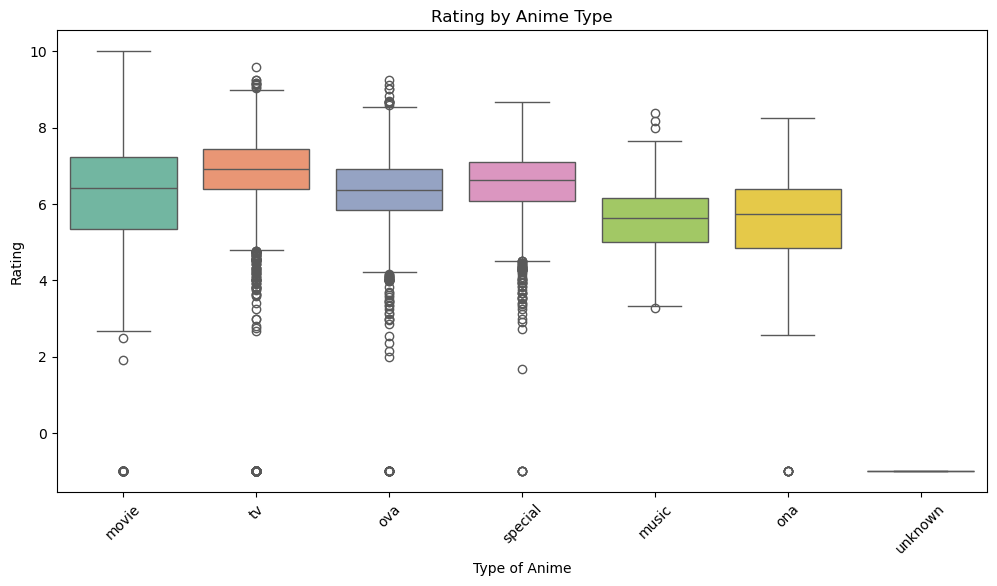

In [224]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=anime_df, palette="Set2")  # Try 'husl', 'coolwarm', 'pastel', etc.
plt.title('Rating by Anime Type')
plt.xlabel('Type of Anime')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [236]:
for name, df in datasets.items():
    for col in df.select_dtypes(include=['object']).columns:
        print(f"Frequency of {col} in {name}:")
        print(df[col].value_counts())  # Sorted by frequency
        print("\n")

Frequency of name in Anime:
name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64


Frequency of genre in Anime:
genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                 

####  Correlation Matrix

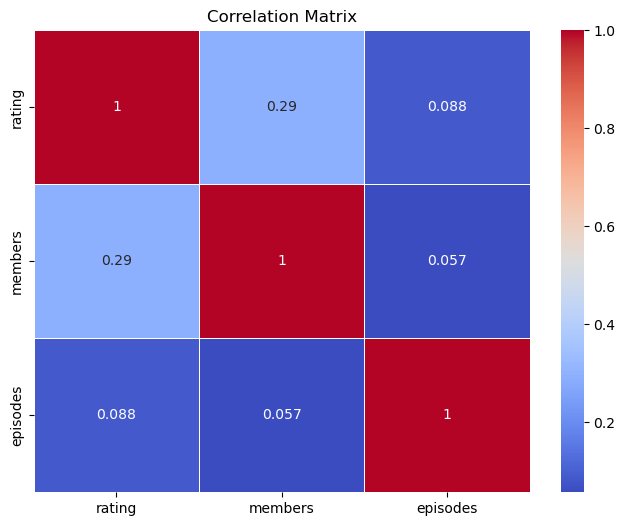

In [238]:
# Correlation matrix
corr_matrix = anime_df[['rating', 'members', 'episodes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 6. Preprocessing

### 7. Model Training

### 8. Model Evaluation

### 9. Hyperparameter Tuning

### 10. Conclusion